In [1]:
!pip install pystan

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot

## M01AB

In [3]:
data = pd.read_csv('pharma/salesdaily.csv',parse_dates=['datum'],usecols=['datum','M01AB'])

In [74]:
data.head()

datum  M01AB
0 2014-01-02    0.0
1 2014-01-03    8.0
2 2014-01-04    2.0
3 2014-01-05    4.0
4 2014-01-06    5.0

#### Renaming columns

In [5]:
data.columns = ['ds','y']

In [76]:
data.head()

ds    y
0 2014-01-02  0.0
1 2014-01-03  8.0
2 2014-01-04  2.0
3 2014-01-05  4.0
4 2014-01-06  5.0

In [77]:
data.tail()

ds     y
2101 2019-10-04  7.34
2102 2019-10-05  3.84
2103 2019-10-06  4.00
2104 2019-10-07  7.34
2105 2019-10-08  0.33

#### Model

In [6]:
model = Prophet()
model.add_country_holidays(country_name='US')

In [7]:
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  "New Year's Day",
  'Martin Luther King Jr. Day',
  "Washington's Birthday",
  'Memorial Day',
  'Independence Day',
  'Labor Day',
  'Columbus Day',
  'Veterans Day',
  'Thanksgiving',
  'Christmas Day',
  'Christmas Day (Observed)',
  "New Year's Day (Observed)",
  'Veterans Day (Observed)',
  'Independence Day (Observed)',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

### Holidays 

In [81]:
model.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

## Prediction

In [8]:
future = model.make_future_dataframe(periods=365)

In [83]:
future.tail()

ds
2466 2020-10-03
2467 2020-10-04
2468 2020-10-05
2469 2020-10-06
2470 2020-10-07

In [9]:
pred = model.predict(future)

In [10]:
pred

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2014-01-02  3.667952    0.164492    7.098035     3.667952     3.667952   
1    2014-01-03  3.670460    0.577474    7.438172     3.670460     3.670460   
2    2014-01-04  3.672968    1.927078    8.559326     3.672968     3.672968   
3    2014-01-05  3.675475    1.208180    7.870472     3.675475     3.675475   
4    2014-01-06  3.677983    0.835140    7.522045     3.677983     3.677983   
...         ...       ...         ...         ...          ...          ...   
2466 2020-10-03  5.399001    3.104913    9.462318     5.268489     5.529715   
2467 2020-10-04  5.399388    2.591777    9.152872     5.268298     5.530745   
2468 2020-10-05  5.399775    2.405174    9.017163     5.268002     5.531853   
2469 2020-10-06  5.400161    2.153321    9.126925     5.267896     5.532962   
2470 2020-10-07  5.400548    1.890572    8.535359     5.267808     5.533841   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
0               0.0                  0.0                  0.0   
1               0.0                  0.0                  0.0   
2               0.0                  0.0                  0.0   
3               0.0                  0.0                  0.0   
4               0.0                  0.0                  0.0   
...             ...                  ...                  ...   
2466            0.0                  0.0                  0.0   
2467            0.0                  0.0                  0.0   
2468            0.0                  0.0                  0.0   
2469            0.0                  0.0                  0.0   
2470            0.0                  0.0                  0.0   

      Christmas Day (Observed)  ...    weekly  weekly_lower  weekly_upper  \
0                          0.0  ... -0.524452     -0.524452     -0.524452   
1                          0.0  ... -0.269100     -0.269100     -0.269100   
2                          0.0  ...  0.672053      0.672053      0.672053   
3                          0.0  ...  0.257009      0.257009      0.257009   
4                          0.0  ...  0.112980      0.112980      0.112980   
...                        ...  ...       ...           ...           ...   
2466                       0.0  ...  0.672053      0.672053      0.672053   
2467                       0.0  ...  0.257009      0.257009      0.257009   
2468                       0.0  ...  0.112980      0.112980      0.112980   
2469                       0.0  ...  0.010789      0.010789      0.010789   
2470                       0.0  ... -0.259278     -0.259278     -0.259278   

        yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0     0.563764      0.563764      0.563764                   0.0   
1     0.573612      0.573612      0.573612                   0.0   
2     0.579187      0.579187      0.579187                   0.0   
3     0.581092      0.581092      0.581092                   0.0   
4     0.579950      0.579950      0.579950                   0.0   
...        ...           ...           ...                   ...   
2466  0.175977      0.175977      0.175977                   0.0   
2467  0.181684      0.181684      0.181684                   0.0   
2468  0.181579      0.181579      0.181579                   0.0   
2469  0.175488      0.175488      0.175488                   0.0   
2470  0.163397      0.163397      0.163397                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                            0.0                         0.0  3.707264  
1                            0.0                         0.0  3.974972  
2                            0.0                         0.0  4.924208  
3                            0.0                         0.0  4.513576  
4                            0.0                         0.0  4.370913  
...                          ...                         ...       ...  
2466                         0

In [11]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
2466 2020-10-03  6.247032    3.104913    9.462318
2467 2020-10-04  5.838080    2.591777    9.152872
2468 2020-10-05  5.694333    2.405174    9.017163
2469 2020-10-06  5.586438    2.153321    9.126925
2470 2020-10-07  5.304668    1.890572    8.535359

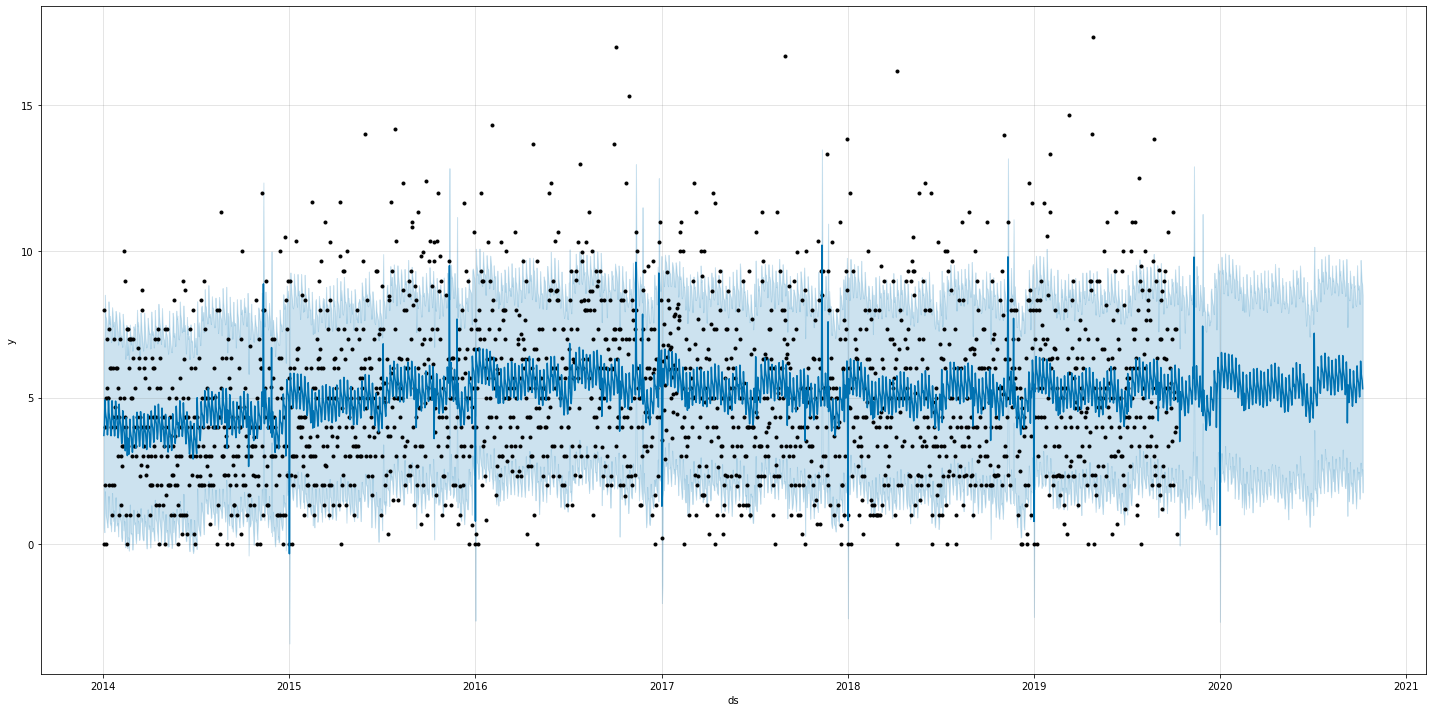

In [87]:
fig1 = model.plot(pred,figsize=(20,10))


## Trend and Seasonality

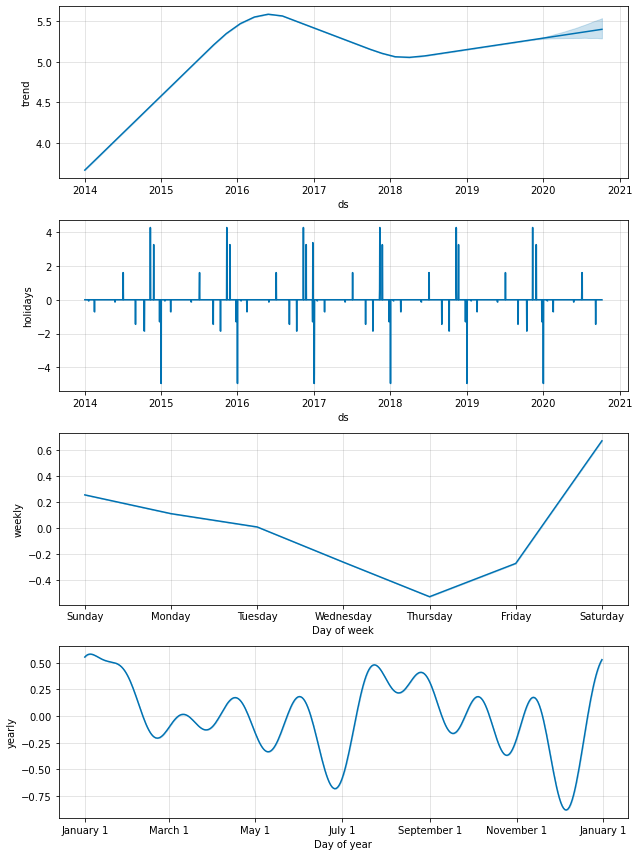

In [88]:
fig2 = model.plot_components(pred)

## Changepoints

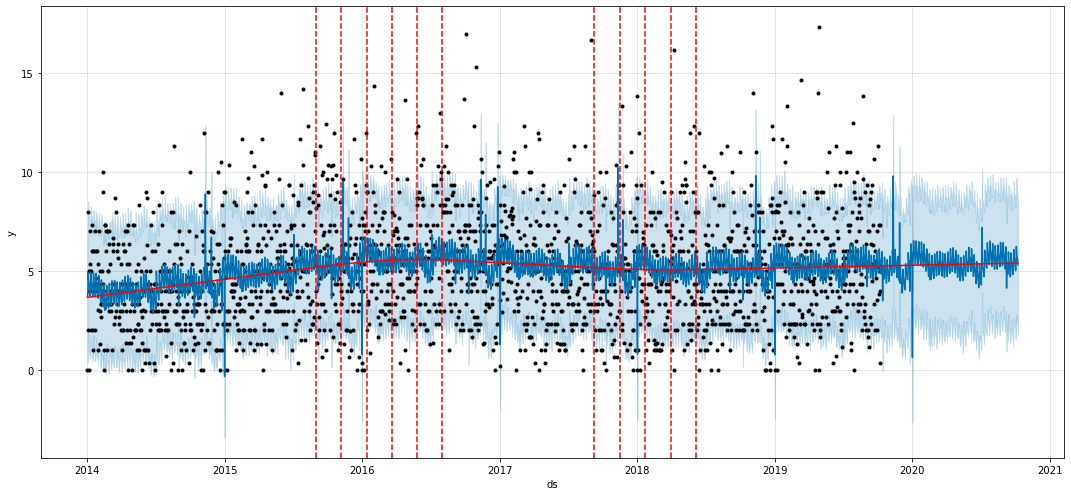

In [89]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(pred,figsize=(15,7))
a = add_changepoints_to_plot(fig.gca(), model, pred)

#### Changepoints : to indicate the time in rapid trend growths.

In [25]:
model.changepoints

67     2014-03-10
135    2014-05-17
202    2014-07-23
269    2014-09-28
337    2014-12-05
404    2015-02-10
471    2015-04-18
539    2015-06-25
606    2015-08-31
673    2015-11-06
741    2016-01-13
808    2016-03-20
875    2016-05-26
942    2016-08-01
1010   2016-10-08
1077   2016-12-14
1144   2017-02-19
1212   2017-04-28
1279   2017-07-04
1346   2017-09-09
1414   2017-11-16
1481   2018-01-22
1548   2018-03-30
1616   2018-06-06
1683   2018-08-12
Name: ds, dtype: datetime64[ns]

## Cross Validation 

In [17]:
df_cv = cross_validation(model,period = '15 days',horizon = '30 days')
df_cv.head()

INFO:fbprophet:Making 114 forecasts with cutoffs between 2015-01-17 00:00:00 and 2019-09-08 00:00:00


ds      yhat  yhat_lower  yhat_upper     y     cutoff
0 2015-01-18  4.151991    1.523199    7.010019  4.00 2015-01-17
1 2015-01-19  6.483647    3.737928    9.278840  5.34 2015-01-17
2 2015-01-20  6.066916    3.357353    8.912344  4.34 2015-01-17
3 2015-01-21  4.896469    2.337310    7.655337  4.00 2015-01-17
4 2015-01-22  4.705423    2.129272    7.417319  4.00 2015-01-17

In [18]:
df_cv.tail()

ds      yhat  yhat_lower  yhat_upper     y     cutoff
3415 2019-10-04  5.142778    1.718374    8.348751  7.34 2019-09-08
3416 2019-10-05  6.089422    2.666342    9.456351  3.84 2019-09-08
3417 2019-10-06  5.723633    2.252495    9.067980  4.00 2019-09-08
3418 2019-10-07  5.563490    2.102701    9.031478  7.34 2019-09-08
3419 2019-10-08  5.449261    1.852042    8.681952  0.33 2019-09-08

## Performance Metrics

In [19]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon       mse      rmse       mae     mdape  coverage
0  3 days  7.449338  2.729348  2.159213  0.350063  0.751462
1  4 days  7.028686  2.651167  2.137714  0.342939  0.736842
2  5 days  6.458125  2.541284  2.025711  0.318480  0.780702
3  6 days  7.464494  2.732123  2.137336  0.326464  0.771930
4  7 days  7.570915  2.751530  2.134804  0.325362  0.780702

In [20]:
df_p.tail()

horizon       mse      rmse       mae     mdape  coverage
23 26 days  7.321506  2.705828  2.200639  0.370309  0.754386
24 27 days  8.390938  2.896712  2.309649  0.391369  0.739766
25 28 days  9.026992  3.004495  2.363119  0.383979  0.730994
26 29 days  9.806215  3.131488  2.415811  0.364917  0.698830
27 30 days  9.010208  3.001701  2.328756  0.334211  0.707602

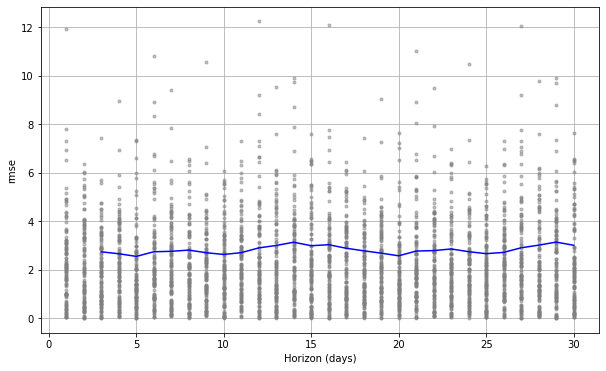

In [21]:
fig = plot_cross_validation_metric(df_cv,metric='rmse')

In [22]:
df_p['rmse'].mean()

2.808722938778532

## M01AE

In [3]:
data = pd.read_csv('pharma/salesdaily.csv',parse_dates=['datum'],usecols=['datum','M01AE'])

In [4]:
data.columns = ['ds','y']

In [5]:
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = model.make_future_dataframe(periods=365)
pred = model.predict(future)
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
2466 2020-10-03  4.079900    1.311475    6.640107
2467 2020-10-04  4.337497    1.653056    6.839191
2468 2020-10-05  3.519120    0.837499    6.035128
2469 2020-10-06  3.291082    0.588411    5.861334
2470 2020-10-07  3.422711    0.730239    6.157910

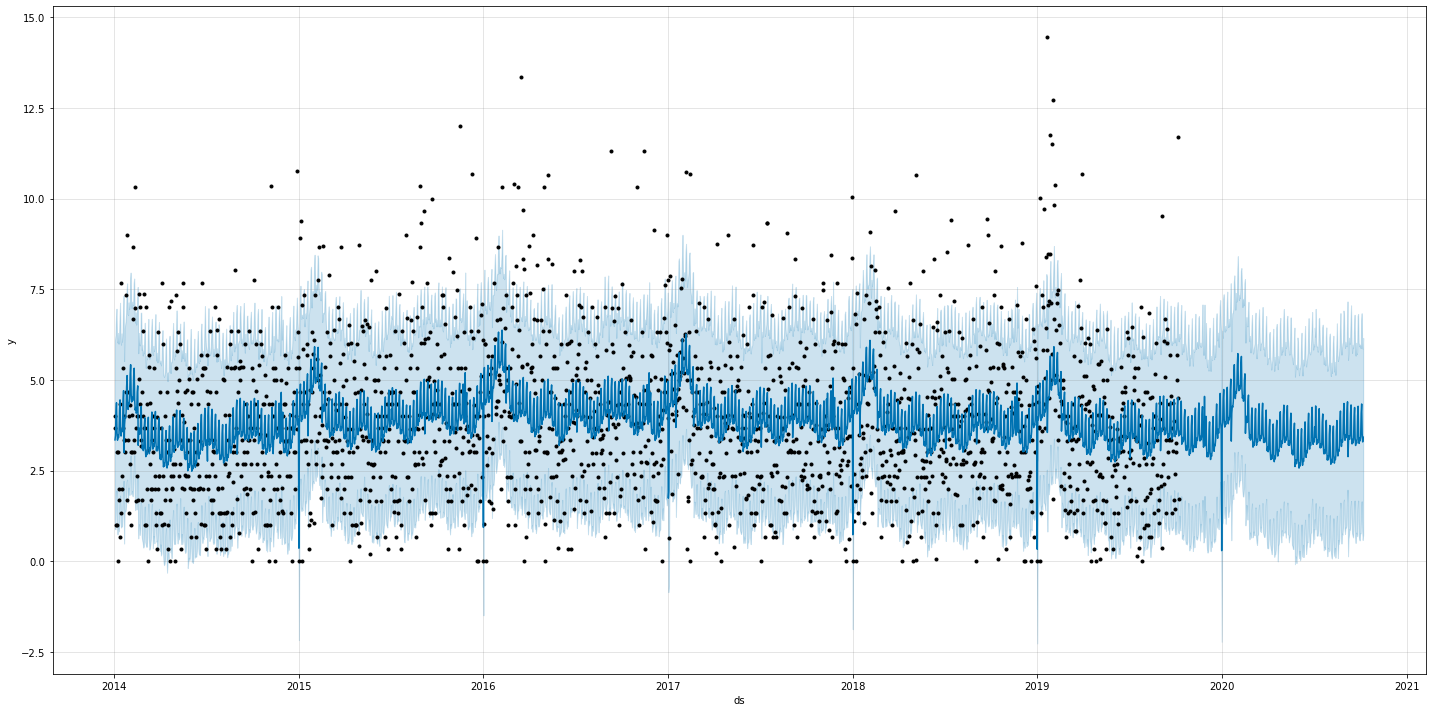

In [7]:
fig1 = model.plot(pred,figsize=(20,10))

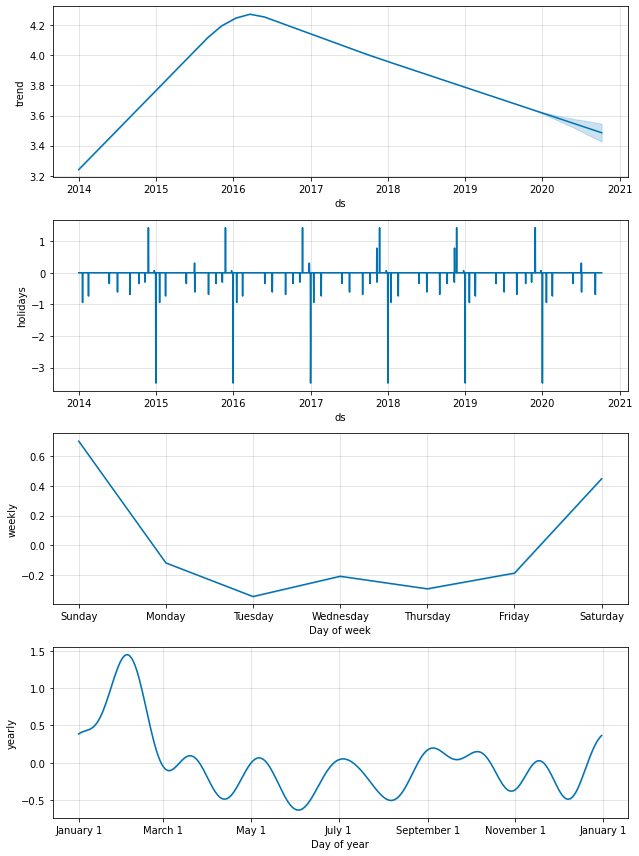

In [8]:
fig2 = model.plot_components(pred)

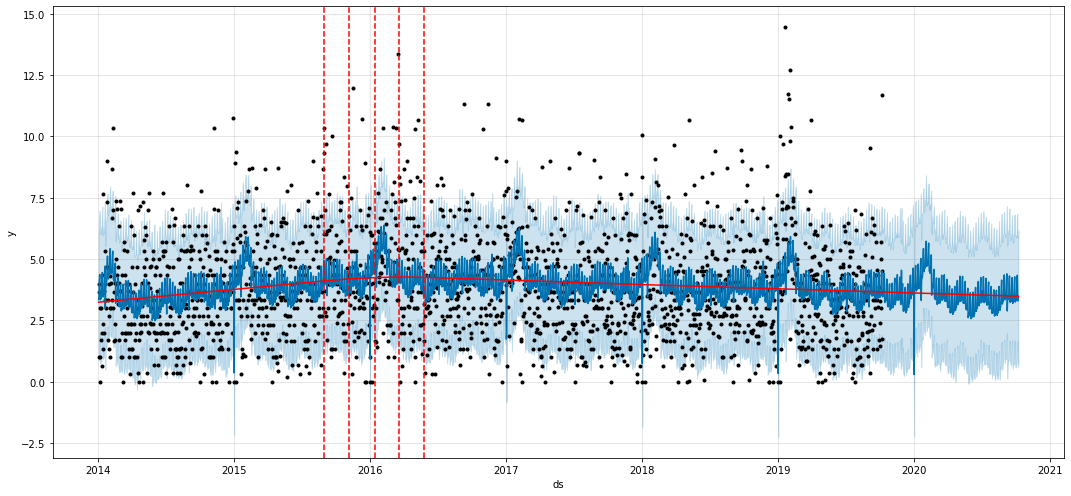

In [11]:
fig = model.plot(pred,figsize=(15,7))
a = add_changepoints_to_plot(fig.gca(), model, pred)

In [12]:
df_cv = cross_validation(model,period = '30 days',horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 22 forecasts with cutoffs between 2017-01-16 00:00:00 and 2018-10-08 00:00:00


ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2017-01-17  4.468812    1.827284    7.062119  4.139167 2017-01-16
1 2017-01-18  4.754699    2.177954    7.351697  4.445833 2017-01-16
2 2017-01-19  4.486223    2.080664    6.988510  5.700000 2017-01-16
3 2017-01-20  4.708774    2.297981    7.182608  4.738750 2017-01-16
4 2017-01-21  5.351249    2.943489    8.211962  2.400000 2017-01-16

In [13]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon       mse      rmse       mae     mdape  coverage
0 37 days  4.046025  2.011473  1.593011  0.345918  0.790162
1 38 days  4.009075  2.002267  1.586943  0.344694  0.790785
2 39 days  3.996306  1.999076  1.585198  0.346356  0.790785
3 40 days  4.016847  2.004207  1.584542  0.347548  0.790162
4 41 days  3.978626  1.994649  1.574541  0.344072  0.793275

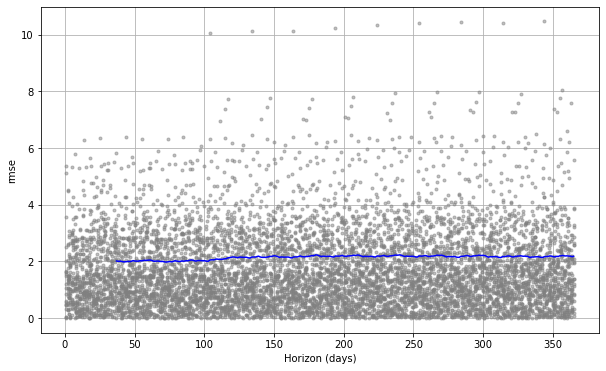

In [14]:
fig = plot_cross_validation_metric(df_cv,metric='rmse')

## N02BA

In [15]:
data = pd.read_csv('pharma/salesdaily.csv',parse_dates=['datum'],usecols=['datum','N02BA'])

In [16]:
data.columns = ['ds','y']
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = model.make_future_dataframe(periods=365)
pred = model.predict(future)
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
2466 2020-10-03  2.823893    0.016108    5.897601
2467 2020-10-04  2.154224   -0.572153    5.094232
2468 2020-10-05  2.593457   -0.202640    5.506699
2469 2020-10-06  2.903486   -0.018604    5.878346
2470 2020-10-07  2.452570   -0.328893    5.325562

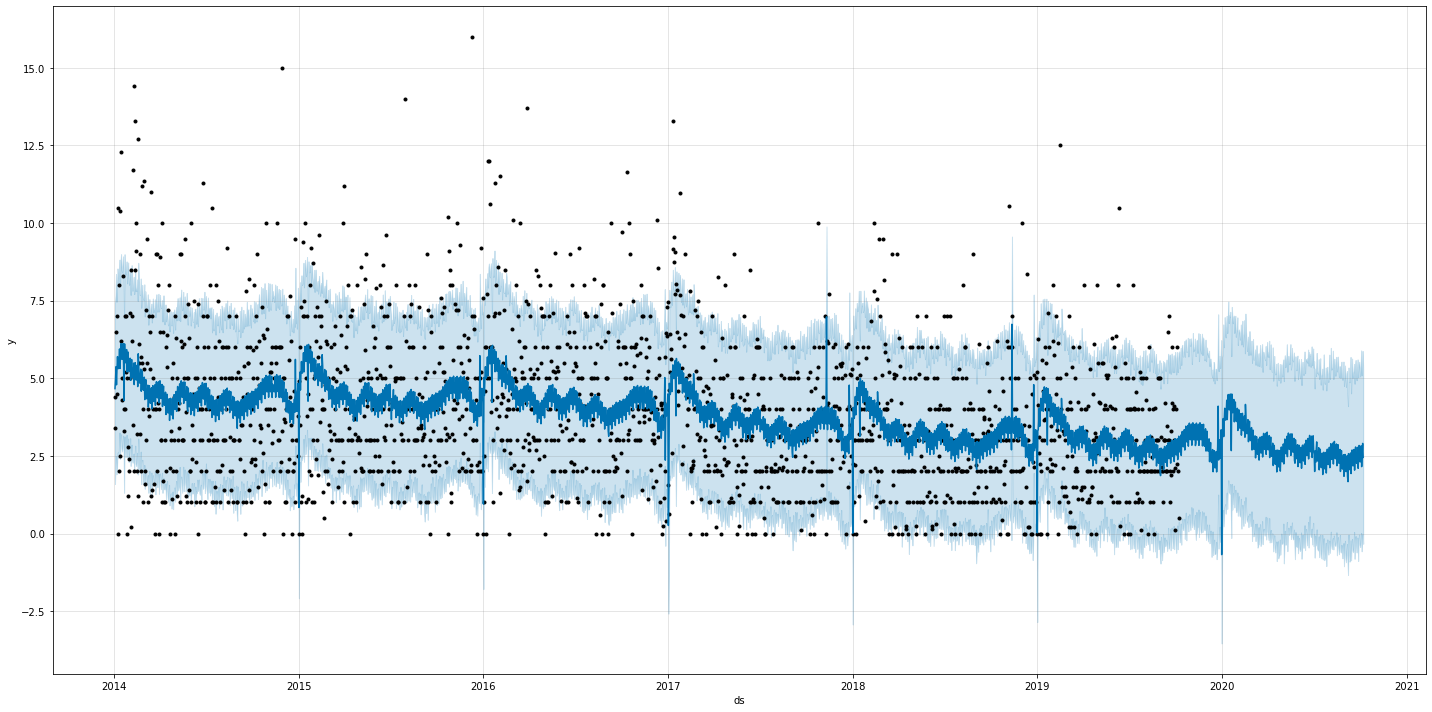

In [18]:
fig1 = model.plot(pred,figsize=(20,10))

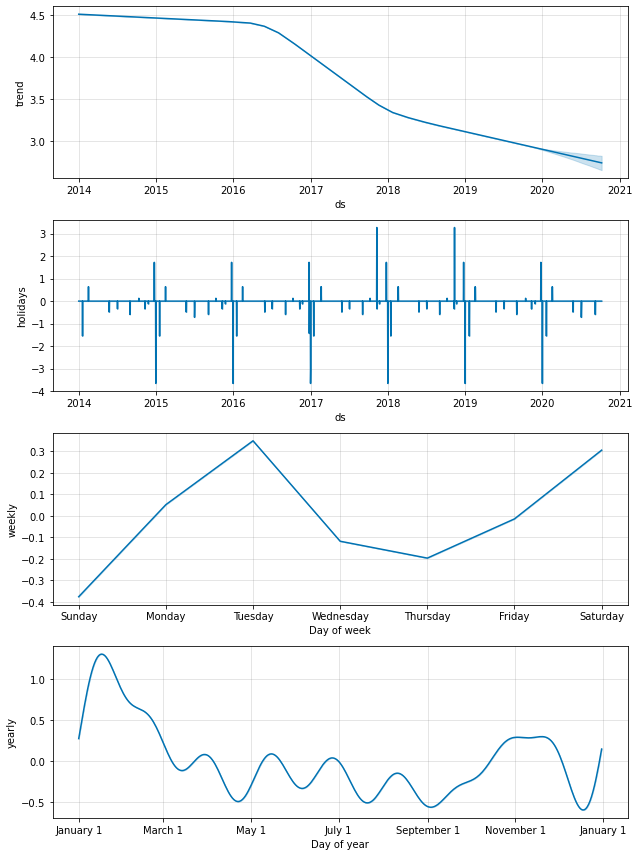

In [19]:
fig2 = model.plot_components(pred)

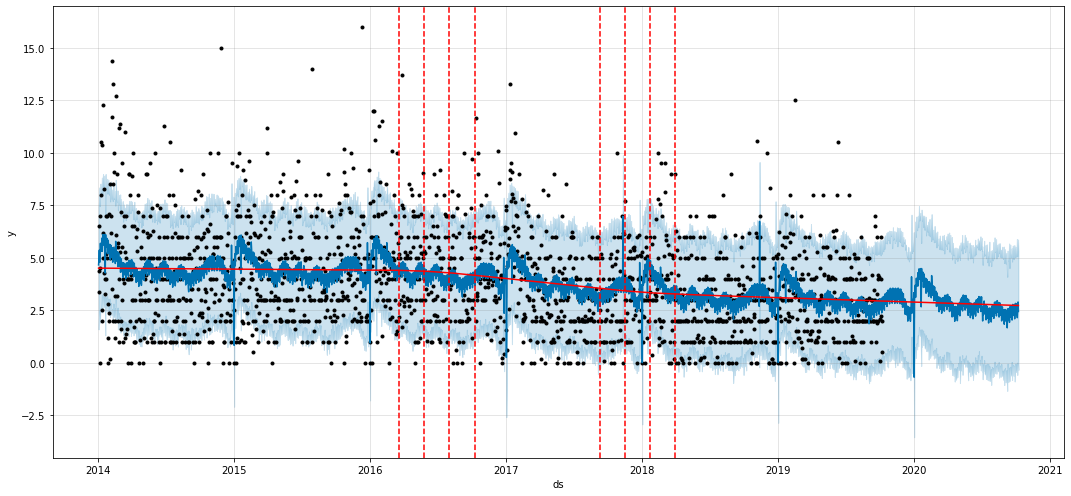

In [20]:
fig = model.plot(pred,figsize=(15,7))
a = add_changepoints_to_plot(fig.gca(), model, pred)

In [21]:
df_cv = cross_validation(model,period = '30 days',horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 22 forecasts with cutoffs between 2017-01-16 00:00:00 and 2018-10-08 00:00:00


ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2017-01-17  6.576020    3.542624    9.810725  5.291667 2017-01-16
1 2017-01-18  6.098849    3.018164    9.082224  6.500000 2017-01-16
2 2017-01-19  5.865390    2.546488    9.042910  7.833333 2017-01-16
3 2017-01-20  6.218806    3.121157    9.242300  4.125000 2017-01-16
4 2017-01-21  6.449049    3.432352    9.728405  4.583333 2017-01-16

In [22]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon       mse      rmse       mae     mdape  coverage
0 37 days  4.465652  2.113209  1.695487  0.436306  0.855542
1 38 days  4.484849  2.117746  1.699736  0.438684  0.854919
2 39 days  4.440822  2.107326  1.696585  0.436306  0.855542
3 40 days  4.386027  2.094284  1.683791  0.439215  0.859278
4 41 days  4.481428  2.116938  1.698517  0.438684  0.855542

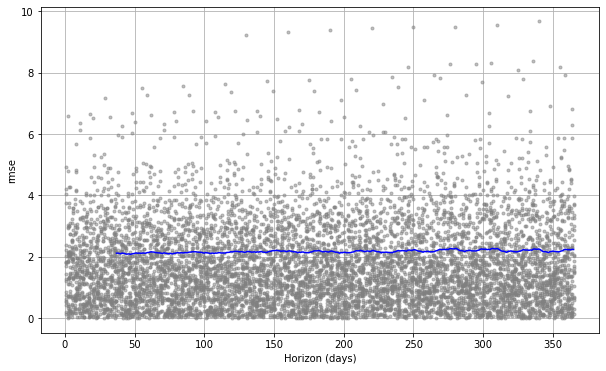

In [23]:
fig = plot_cross_validation_metric(df_cv,metric='rmse')

In [24]:
df_p['rmse'].mean()

2.168373709651781

## N02BE

In [25]:
data = pd.read_csv('pharma/salesdaily.csv',parse_dates=['datum'],usecols=['datum','N02BE'])

In [26]:
data.columns = ['ds','y']
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = model.make_future_dataframe(periods=365)
pred = model.predict(future)
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
2466 2020-10-03  46.387392   29.670448   61.401803
2467 2020-10-04  46.716682   29.728278   62.454568
2468 2020-10-05  43.006725   26.089959   59.172629
2469 2020-10-06  42.316295   26.372615   57.327563
2470 2020-10-07  42.121423   26.680602   58.381638

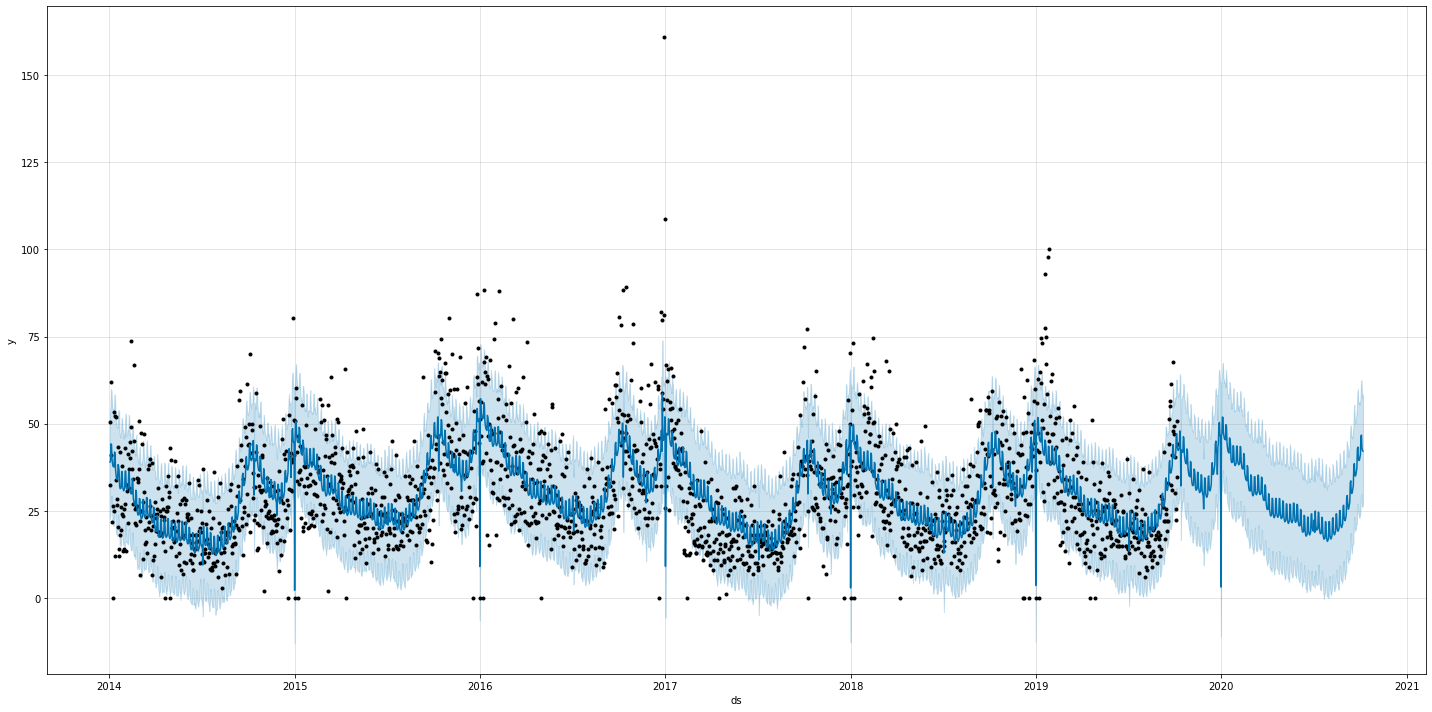

In [28]:
fig1 = model.plot(pred,figsize=(20,10))

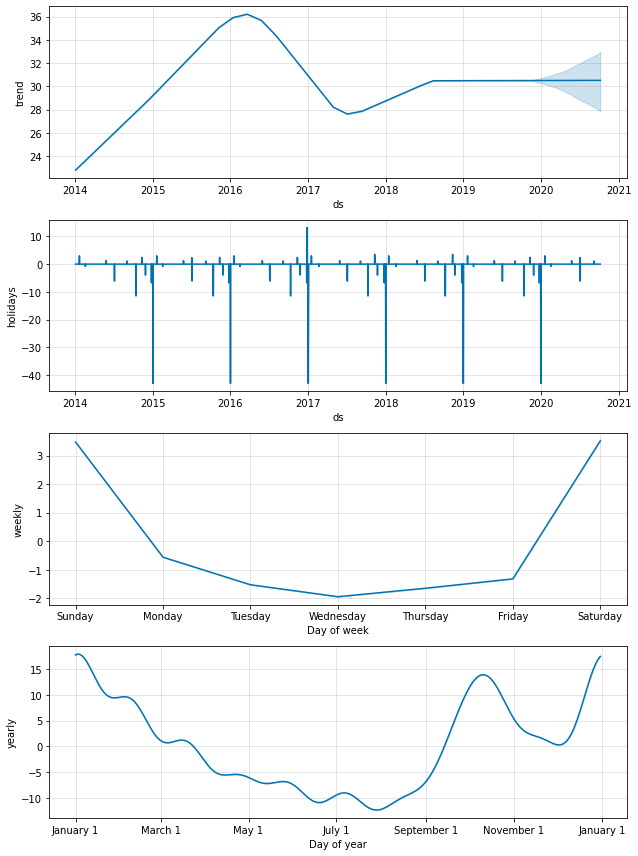

In [29]:
fig2 = model.plot_components(pred)

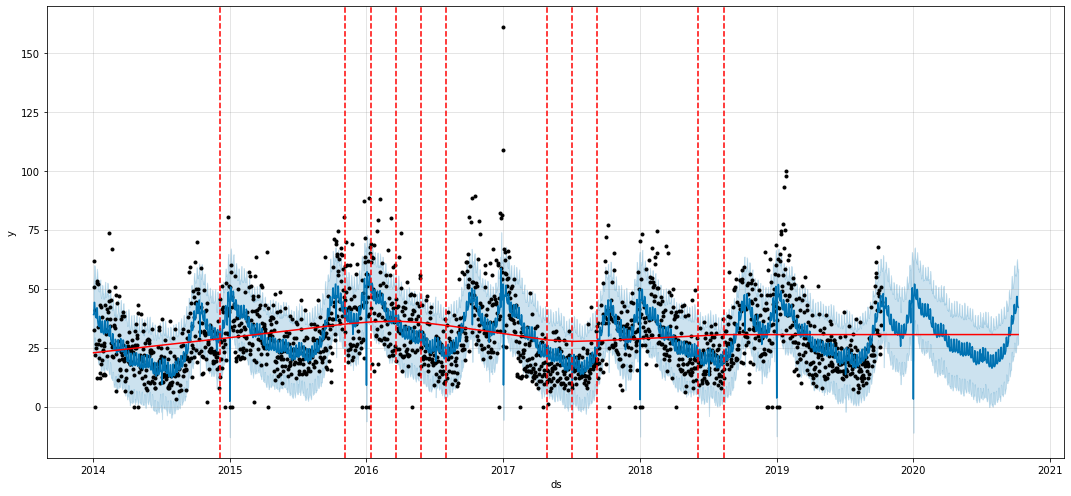

In [30]:
fig = model.plot(pred,figsize=(15,7))
a = add_changepoints_to_plot(fig.gca(), model, pred)

In [31]:
df_cv = cross_validation(model,period = '30 days',horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 22 forecasts with cutoffs between 2017-01-16 00:00:00 and 2018-10-08 00:00:00


ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2017-01-17  44.415991   28.559587   60.099053  48.458333 2017-01-16
1 2017-01-18  42.502913   25.951580   58.854815  45.958333 2017-01-16
2 2017-01-19  42.332686   26.335172   58.258444  37.750000 2017-01-16
3 2017-01-20  40.742036   24.186934   56.198860  37.625000 2017-01-16
4 2017-01-21  46.715153   30.983657   63.452224  50.208333 2017-01-16

INFO:fbprophet:Skipping MAPE because y close to 0


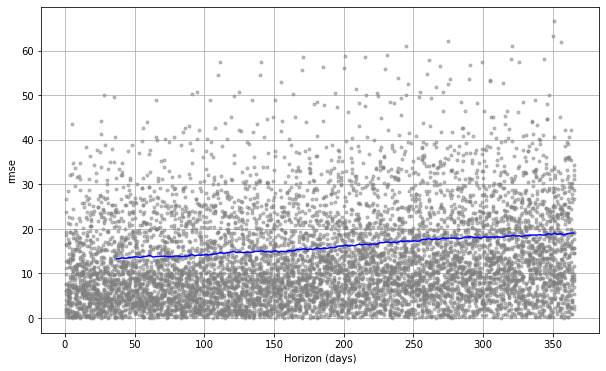

In [32]:
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv,metric='rmse')

In [33]:
df_p['rmse'].mean()

16.199109542459908

## N05B

In [34]:
data = pd.read_csv('pharma/salesdaily.csv',parse_dates=['datum'],usecols=['datum','N05B'])

In [35]:
data.columns = ['ds','y']
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = model.make_future_dataframe(periods=365)
pred = model.predict(future)
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
2466 2020-10-03   8.851299    2.102940   15.568322
2467 2020-10-04   6.113438   -0.427904   12.402577
2468 2020-10-05   9.797334    2.863554   16.244657
2469 2020-10-06  10.033241    3.426157   16.912818
2470 2020-10-07  10.575436    4.222633   17.039362

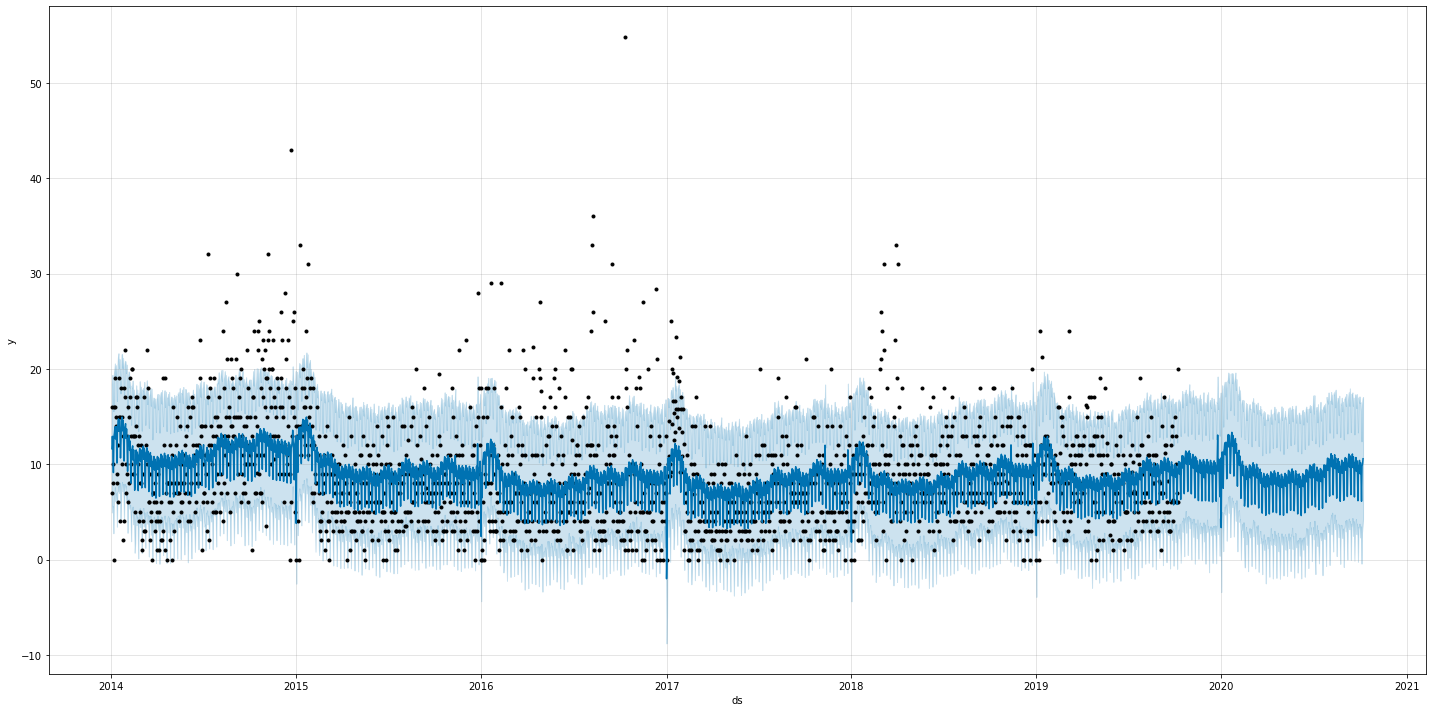

In [37]:
fig1 = model.plot(pred,figsize=(20,10))

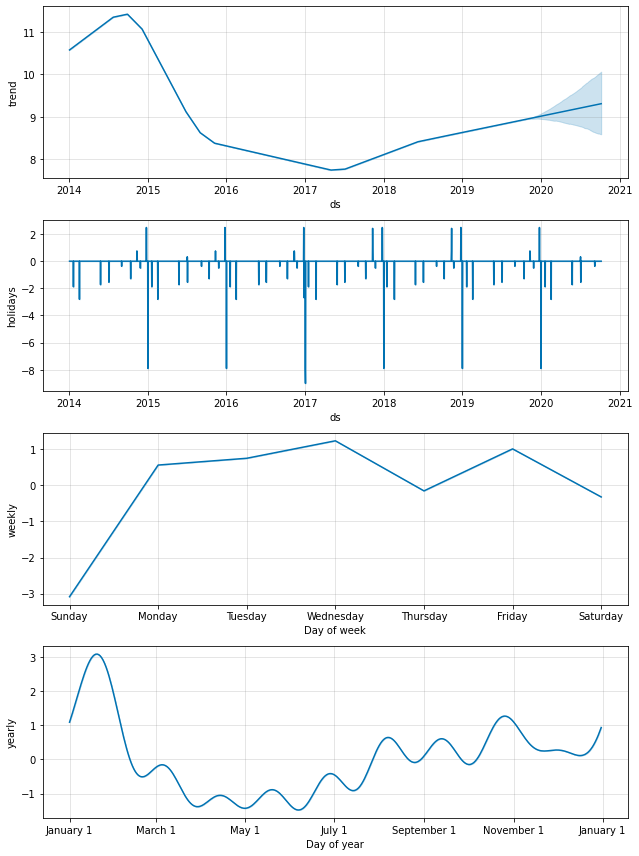

In [38]:
fig2 = model.plot_components(pred)

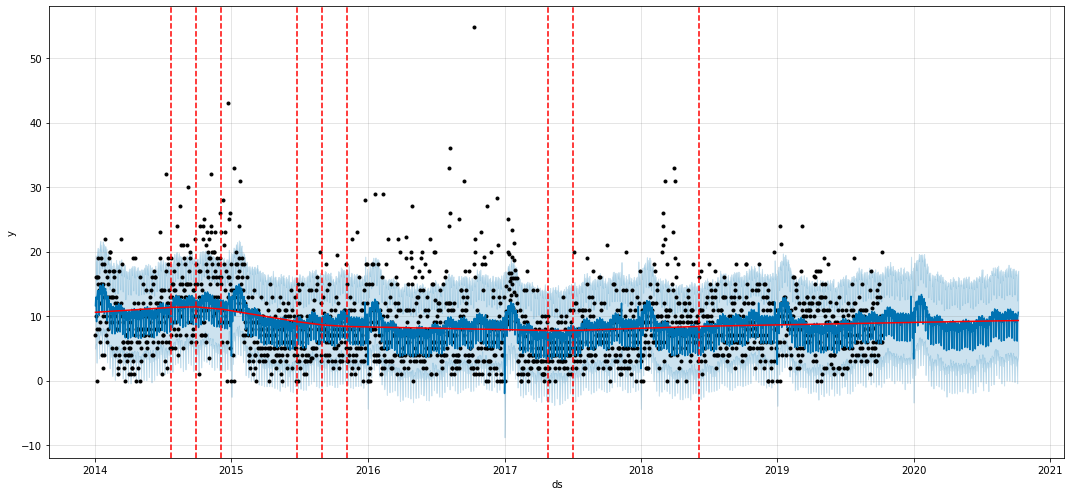

In [39]:
fig = model.plot(pred,figsize=(15,7))
a = add_changepoints_to_plot(fig.gca(), model, pred)

In [40]:
df_cv = cross_validation(model,period = '30 days',horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 22 forecasts with cutoffs between 2017-01-16 00:00:00 and 2018-10-08 00:00:00


ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2017-01-17  13.129138    5.729476   19.584029  13.333333 2017-01-16
1 2017-01-18  13.087994    6.257572   20.034914  16.666667 2017-01-16
2 2017-01-19  11.517733    4.646054   18.315858  15.833333 2017-01-16
3 2017-01-20  13.023297    6.428684   20.258563  23.333333 2017-01-16
4 2017-01-21  11.923644    5.451861   18.814983  15.000000 2017-01-16

INFO:fbprophet:Skipping MAPE because y close to 0


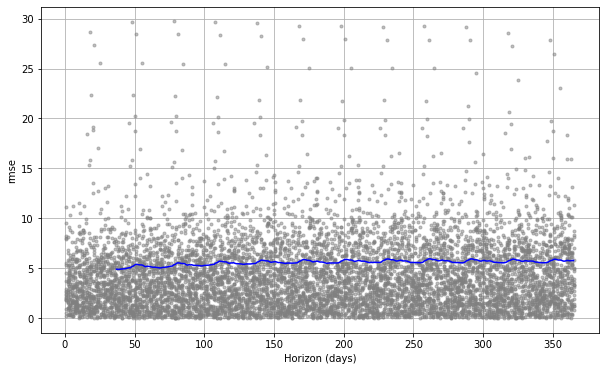

In [41]:
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv,metric='rmse')

In [42]:
df_p['rmse'].mean()

5.561229563473356

## N05C

In [43]:
data = pd.read_csv('pharma/salesdaily.csv',parse_dates=['datum'],usecols=['datum','N05C'])

In [44]:
data.columns = ['ds','y']
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future = model.make_future_dataframe(periods=365)
pred = model.predict(future)
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
2466 2020-10-03  0.838930   -0.527485    2.254080
2467 2020-10-04  0.621567   -0.748899    1.874114
2468 2020-10-05  0.890757   -0.423203    2.360728
2469 2020-10-06  1.000609   -0.358207    2.369618
2470 2020-10-07  0.918477   -0.565598    2.272916

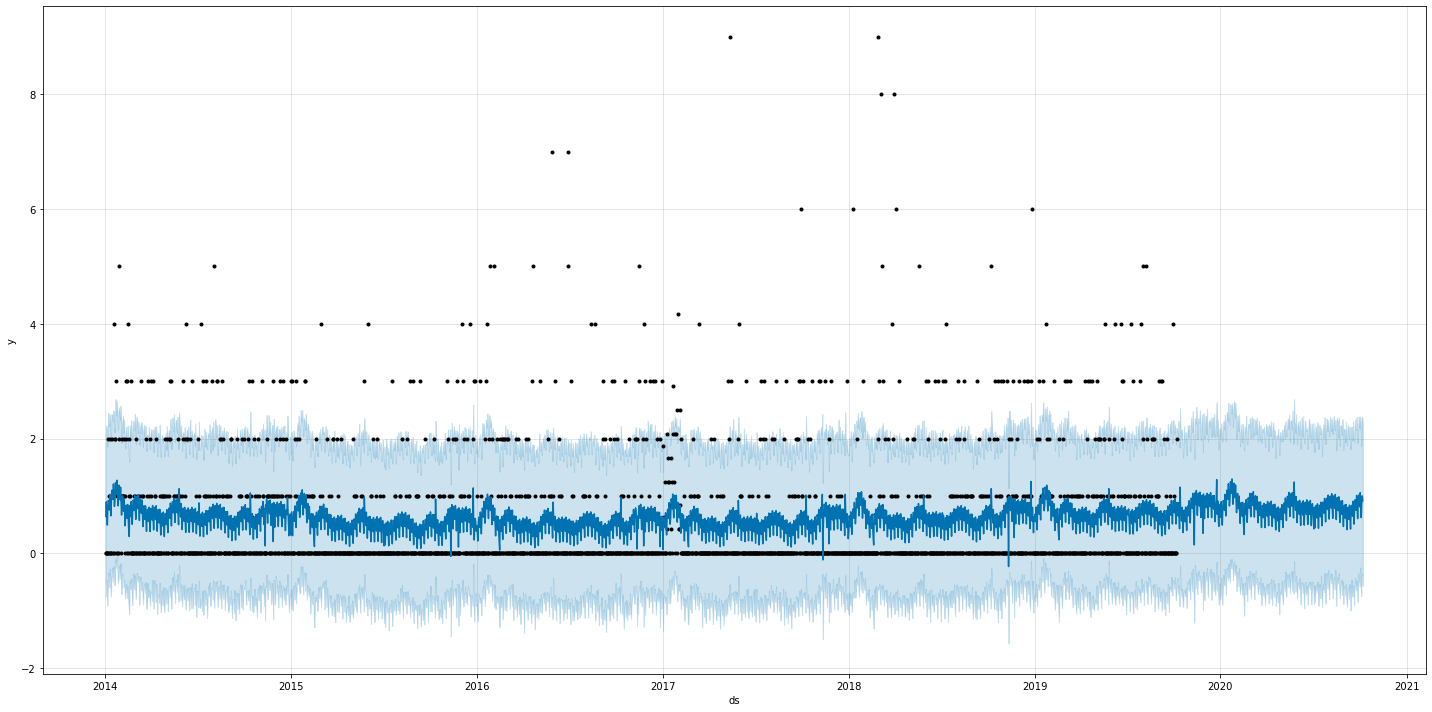

In [46]:
fig1 = model.plot(pred,figsize=(20,10))

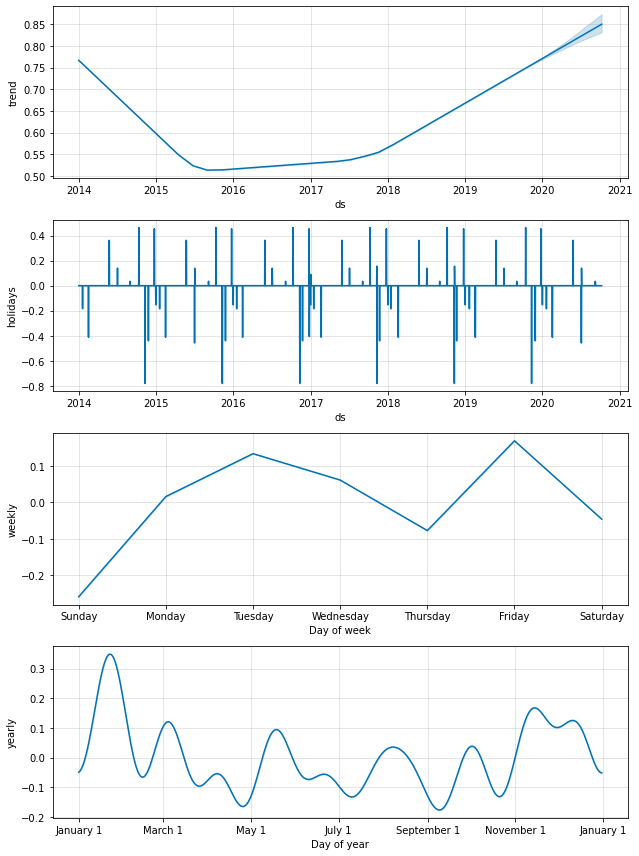

In [47]:
fig2 = model.plot_components(pred)

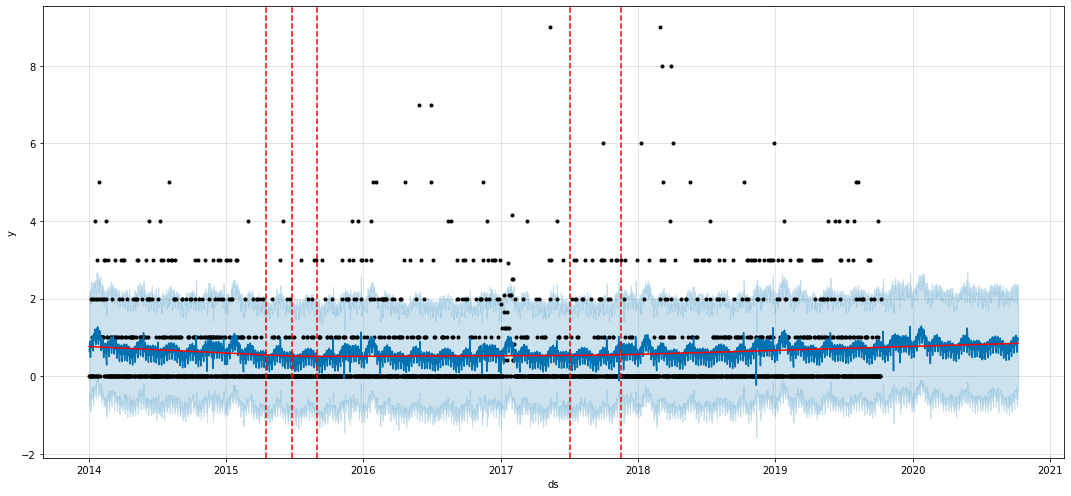

In [48]:
fig = model.plot(pred,figsize=(15,7))
a = add_changepoints_to_plot(fig.gca(), model, pred)

In [49]:
df_cv = cross_validation(model,period = '30 days',horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 22 forecasts with cutoffs between 2017-01-16 00:00:00 and 2018-10-08 00:00:00


ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2017-01-17  0.902775   -0.322406    2.284931  1.666667 2017-01-16
1 2017-01-18  0.939100   -0.401962    2.161538  1.250000 2017-01-16
2 2017-01-19  0.721068   -0.583331    1.913498  0.000000 2017-01-16
3 2017-01-20  1.087380   -0.221897    2.397276  2.916667 2017-01-16
4 2017-01-21  0.832698   -0.438941    2.028828  2.083333 2017-01-16

INFO:fbprophet:Skipping MAPE because y close to 0


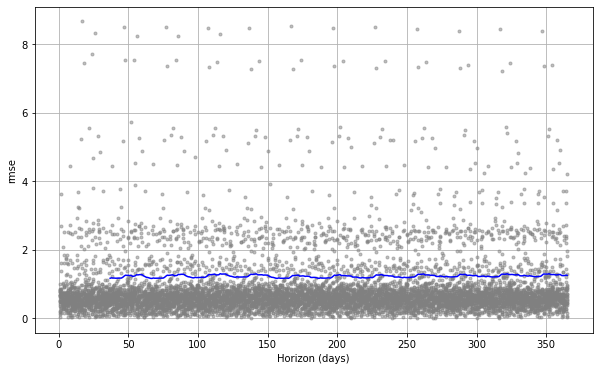

In [50]:
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv,metric='rmse')

In [51]:
df_p['rmse'].mean()

1.2244902105458877

## R03 

In [52]:
data = pd.read_csv('pharma/salesdaily.csv',parse_dates=['datum'],usecols=['datum','R03'])

In [53]:
data.columns = ['ds','y']
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
future = model.make_future_dataframe(periods=365)
pred = model.predict(future)
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
2466 2020-10-03   9.954952    2.594807   17.544098
2467 2020-10-04   9.892014    1.960208   17.870786
2468 2020-10-05  10.705213    3.477011   18.436973
2469 2020-10-06  10.232807    2.058315   17.544273
2470 2020-10-07  10.320028    2.472525   18.166683

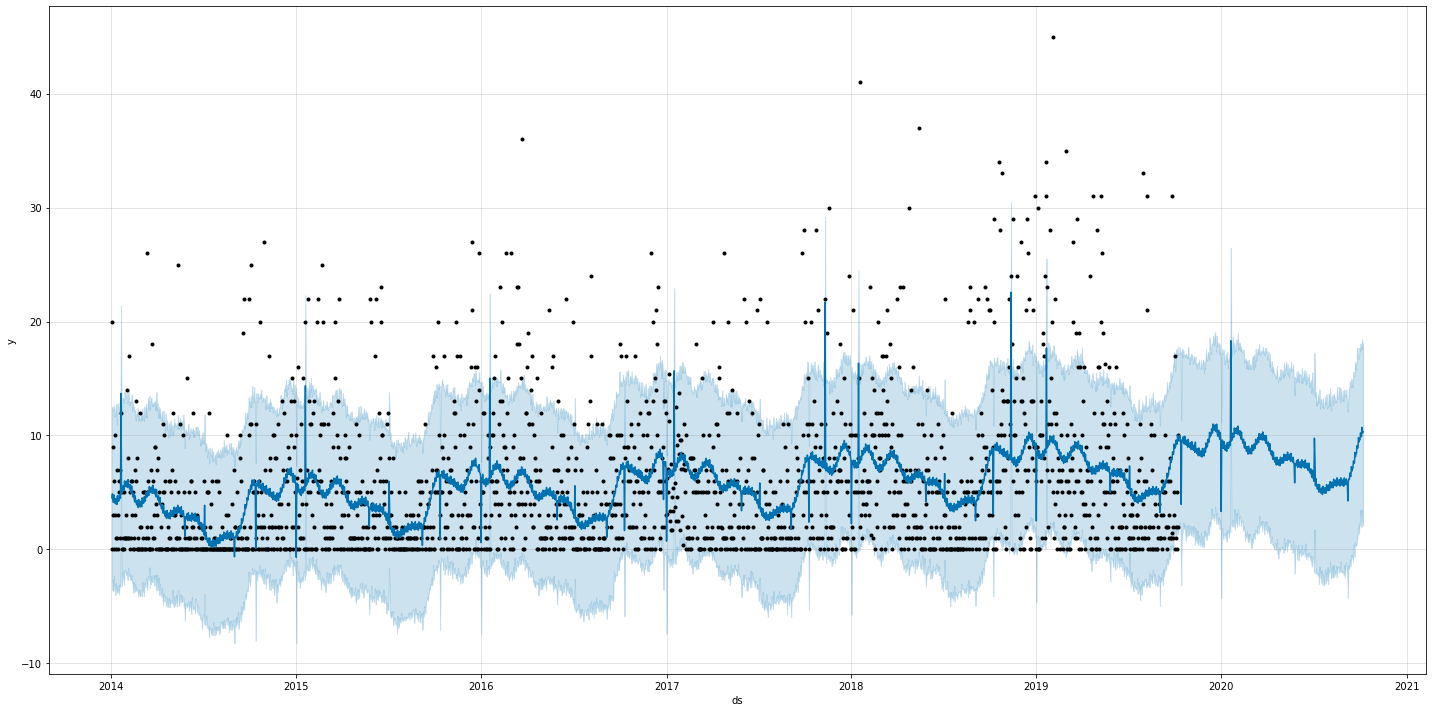

In [55]:
fig1 = model.plot(pred,figsize=(20,10))

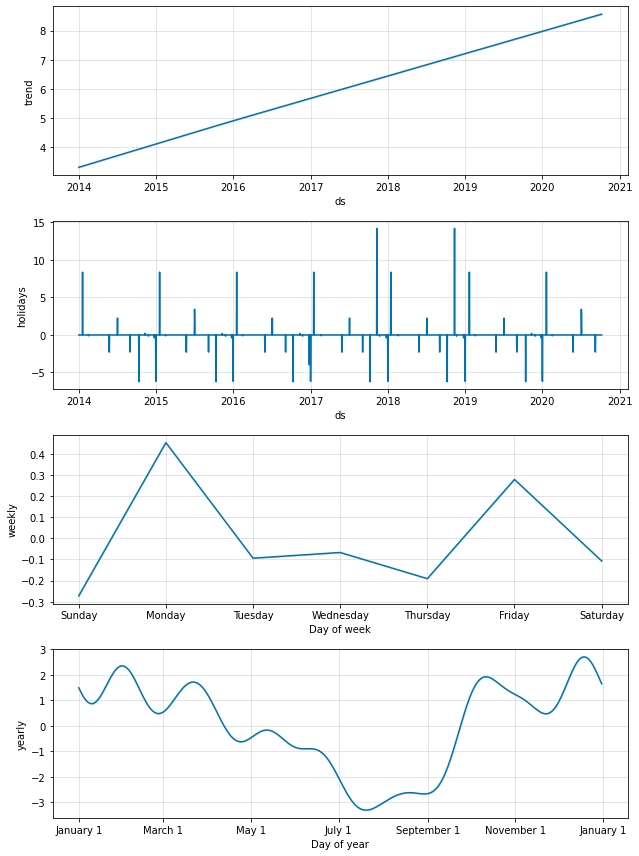

In [56]:
fig2 = model.plot_components(pred)

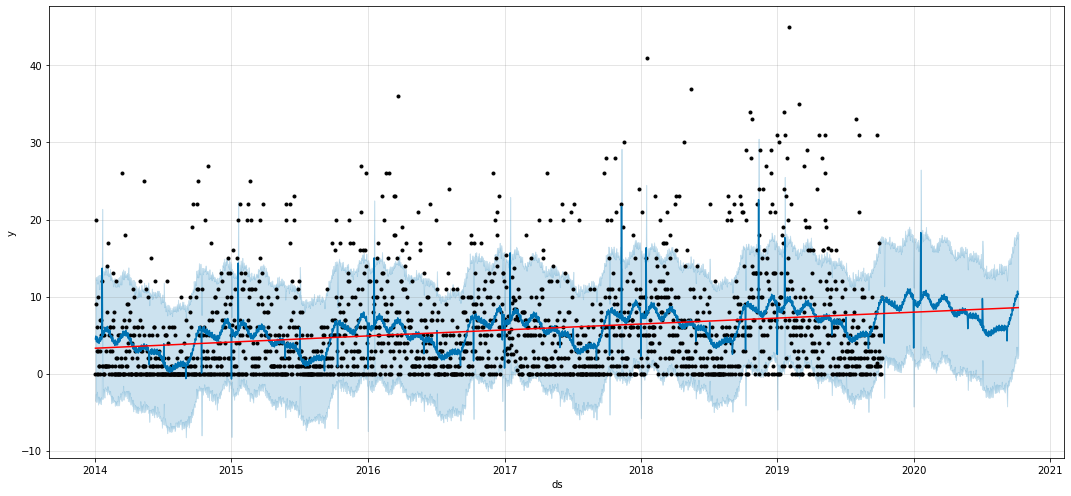

In [57]:
fig = model.plot(pred,figsize=(15,7))
a = add_changepoints_to_plot(fig.gca(), model, pred)

In [58]:
df_cv = cross_validation(model,period = '30 days',horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 22 forecasts with cutoffs between 2017-01-16 00:00:00 and 2018-10-08 00:00:00


ds      yhat  yhat_lower  yhat_upper          y     cutoff
0 2017-01-17  5.802656   -0.649077   12.978029   3.750000 2017-01-16
1 2017-01-18  5.984845   -0.845988   12.609282   5.833333 2017-01-16
2 2017-01-19  5.458778   -0.995304   11.994067   2.500000 2017-01-16
3 2017-01-20  6.490154    0.211105   13.287727  12.500000 2017-01-16
4 2017-01-21  6.555395   -0.340706   13.423470   4.583333 2017-01-16

INFO:fbprophet:Skipping MAPE because y close to 0


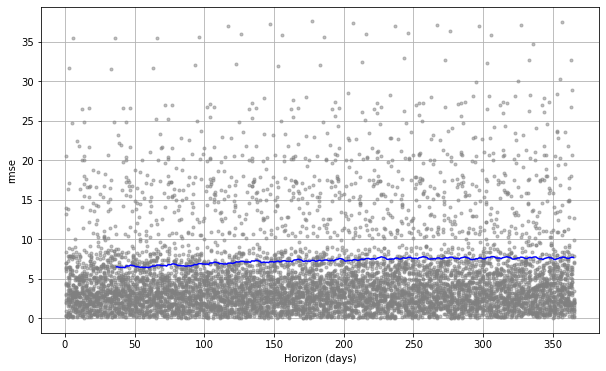

In [59]:
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv,metric='rmse')

In [60]:
df_p['rmse'].mean()

7.257237082599386

## R06

In [61]:
data = pd.read_csv('pharma/salesdaily.csv',parse_dates=['datum'],usecols=['datum','R06'])

In [62]:
data.columns = ['ds','y']
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
future = model.make_future_dataframe(periods=365)
pred = model.predict(future)
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
2466 2020-10-03  3.154518    0.700316    5.618259
2467 2020-10-04  2.879933    0.239660    5.439467
2468 2020-10-05  2.762819    0.140905    5.298709
2469 2020-10-06  2.947731    0.397465    5.505040
2470 2020-10-07  2.572097   -0.024737    5.204127

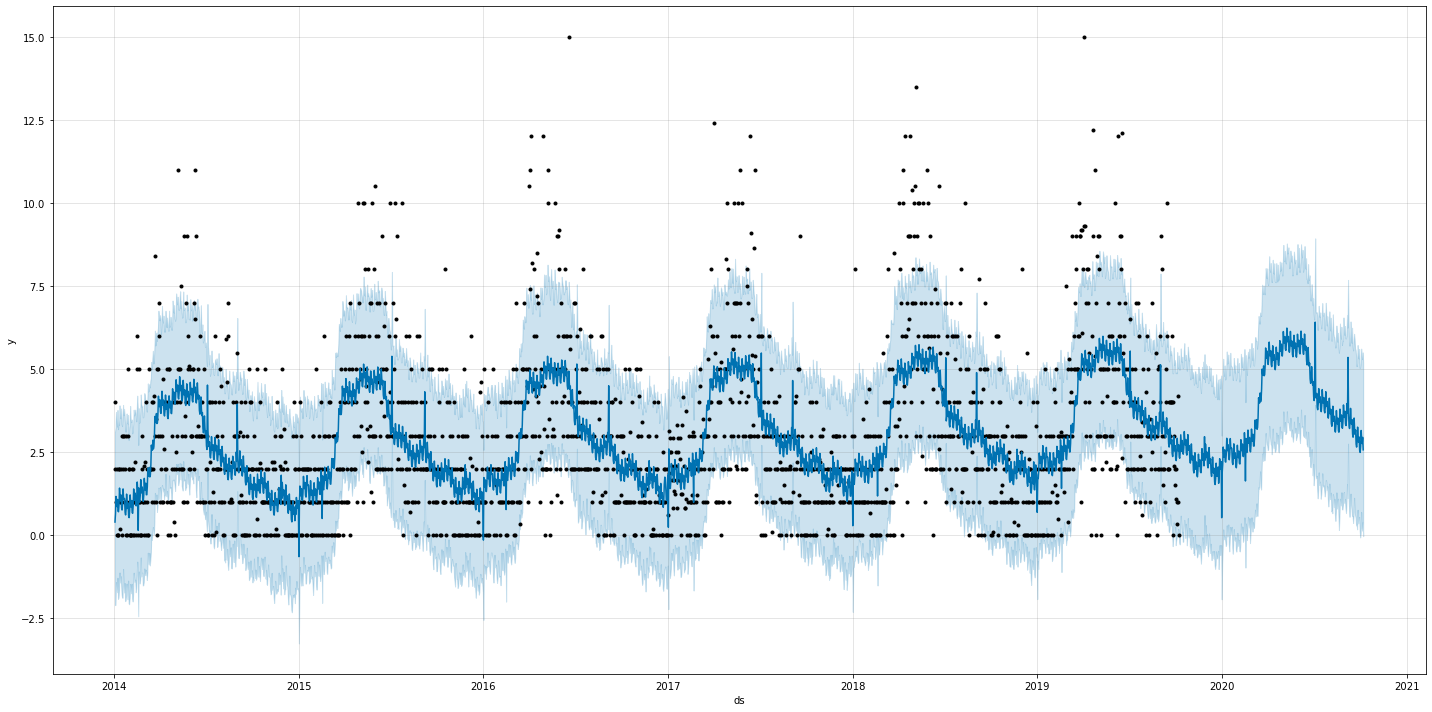

In [64]:
fig1 = model.plot(pred,figsize=(20,10))

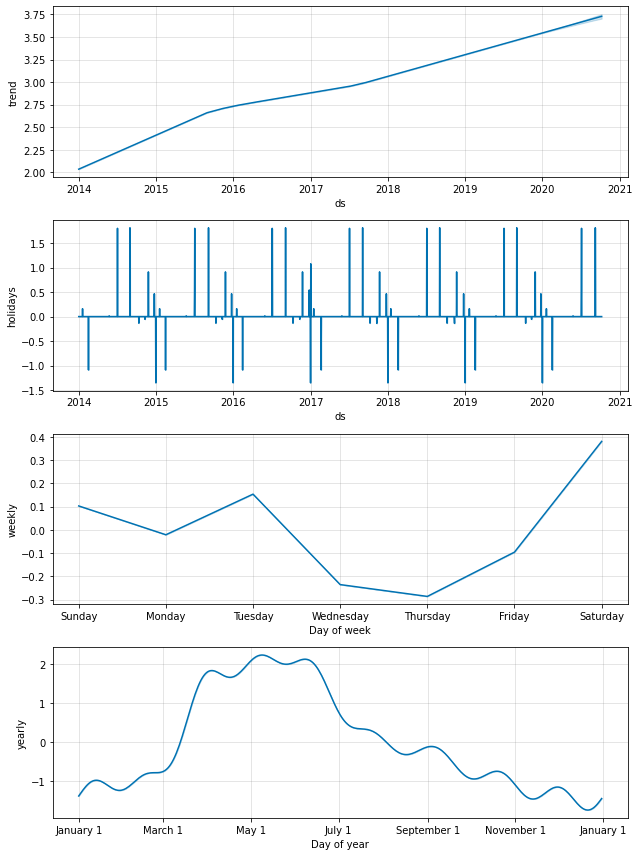

In [65]:
fig2 = model.plot_components(pred)

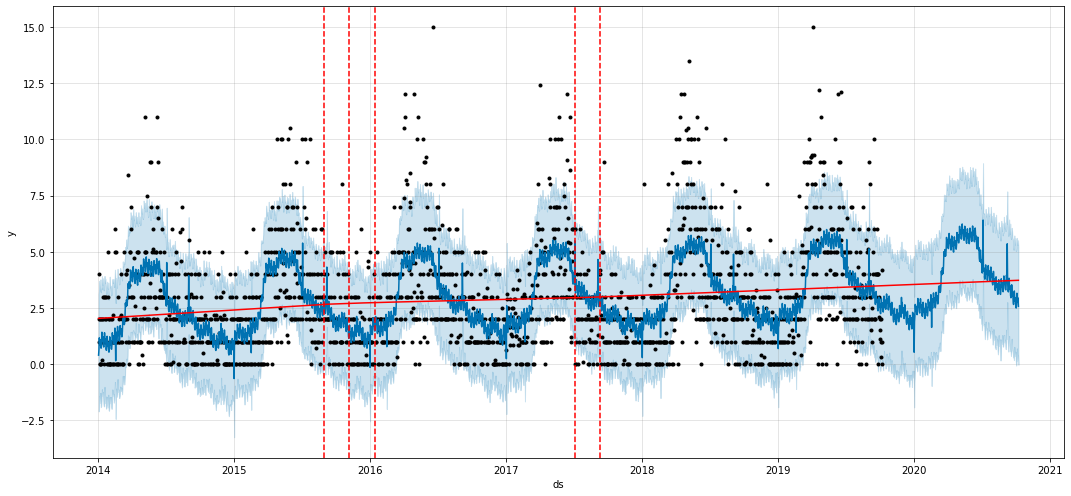

In [66]:
fig = model.plot(pred,figsize=(15,7))
a = add_changepoints_to_plot(fig.gca(), model, pred)

In [67]:
df_cv = cross_validation(model,period = '30 days',horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 22 forecasts with cutoffs between 2017-01-16 00:00:00 and 2018-10-08 00:00:00


ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2017-01-17  2.047926   -0.428739    4.507767  2.500000 2017-01-16
1 2017-01-18  1.775978   -0.441586    4.085412  0.833333 2017-01-16
2 2017-01-19  1.664044   -0.683306    4.088348  3.333333 2017-01-16
3 2017-01-20  1.807439   -0.499136    4.218792  2.500000 2017-01-16
4 2017-01-21  2.472198   -0.095750    4.849864  2.916667 2017-01-16

INFO:fbprophet:Skipping MAPE because y close to 0


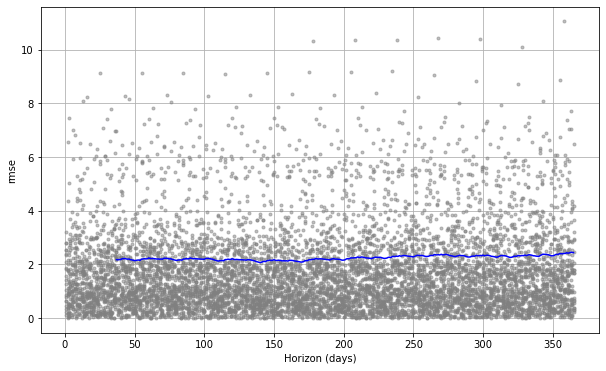

In [68]:
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv,metric='rmse')

In [69]:
df_p['rmse'].mean()

2.2419255244583245